In [30]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#loading the training data for the titanic model
titanic_df = pd.read_csv('titanic_training_data.csv')

#printing the dimensions of the training data
rows = titanic_df.shape[0]
columns = titanic_df.shape[1]
print('The dimensions of the table are {:d} rows by {:d} columns'.format(rows, columns))

#print the first 10 rows of the training set
titanic_df.head(n = 10)

The dimensions of the table are 891 rows by 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Below is a legend for what each of the columns in the table represent 

- __PassengerId__: Unique number to represent the passenger 
- __Survived__: Whether the passenger survived of not. (0 = No, 1 = Yes)
- __Pclass__: The class the passenger was travelling in. (1 = Upper class; 2 = Middle class; 3 = Lower class)
- __Name__: Name of the passenger.
- __Sex__: Gender of the passenger.
- __Age__: Age of the passenger. (Some entries are not available)
- __SibSp__: Number of Sibling/Spouse abord of the passenger.
- __Parch__: Number of Parent/Child abord of the passenger. 
- __Ticket__: Ticket number of the passenger.
- __Fare__: Amount paid for the ticket by the passenger.
- __Cabin__: Cabin number occupied by the passenger on the ship (Some entries are not available) 
- __Embarked__: The port in which the passenger has embarked. (C = Cherbourg, S = Southampton, Q = Queenstown)

We will add a new column to the table to indicate our prediction for if the passenger survived or not.

Initially we will presume that all the passengers did not survive

In [32]:
def reset_prediction(df):
    df['Prediction'] = 0
    
reset_prediction(titanic_df)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


# Predictions

We will now study the different possible factors that led to a passengers survival.
Possible factors include the Age, Sex, PClass, SibSp, Parch, Fare and Embarked. 

We will now create a function that will help us predict the accuracy of our predictions.

In [34]:
def calculate_accuracy(df):
    count = 0 
    for index, row in df.iterrows():
        if row['Prediction'] == row['Survived']:
            count += 1
    accuracy = float(count)/float(rows)
    print(str(round(accuracy,4)*100) + '%')


## Effect of Age on the survival of passengers

Text(0.5,1,u'Effect of Age on Survival')

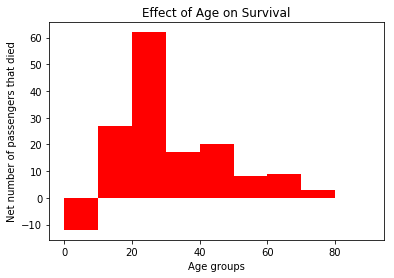

In [35]:
def get_difference(df, lower_range, upper_range):
    #getting number of survivors in age category that survived
    num_survivors = df.loc[(df["Age"] > lower_range) & (df["Age"] <= upper_range) & (df["Survived"] == 1)].shape[0]
    #getting number of survivors in age category that did not survive
    num_dead = df.loc[(df["Age"] > lower_range) & (df["Age"] <= upper_range) & (df["Survived"] == 0)].shape[0]
    return num_dead - num_survivors
    

#getting max age
max_age = titanic_df["Age"].max()
#creating the bins 
age_groups = np.arange(0,max_age+10,10)
age_differences = []
for index, age in enumerate(age_groups):
    age_differences.append(get_difference(titanic_df,age,age+10))
    

plt.bar(age_groups, age_differences, align = 'edge', width = 10, color = 'red')
plt.xlabel('Age groups')
plt.ylabel('Net number of passengers that died')
plt.title('Effect of Age on Survival')


If the line is below the x axis it means that more people in that age group survived than died. 

It is shown in the graph that the above applies for people between the ages of 0 and 10. 

For future calculations we will consider that all children under the age of 10 survived the ship wreckage. 
It is perhaphs because parents ensured that their kids reached safety before putting themselves on the limited life boats on the ship.

We will now calculate the accuracy of the claim that only children below the age of 10 survived the ship wreckage.

In [36]:
#setting prediction to 1 for all people under the age of 10 
def age_prediction(df):
    predictions = []
    for index, row in df.iterrows():
        if (row["Age"]) < 10 :
            predictions.append(1)
        else:
            predictions.append(0)
    df["Prediction"] = predictions

reset_prediction(titanic_df)
age_prediction(titanic_df)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [37]:
calculate_accuracy(titanic_df)

63.19%


## Effect of Sex on the survival of passengers


Text(0.5,1,u'Effect of Sex on Survival')

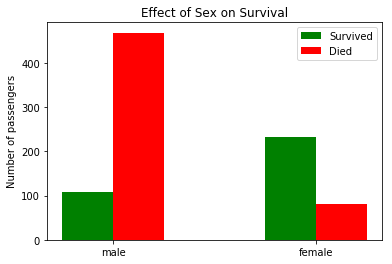

In [41]:
sex_df = titanic_df[["Sex", "Survived"]]
#number of males that survived
survived_male = sex_df.loc[(sex_df["Survived"] == 1) & (sex_df["Sex"] == 'male')].shape[0]
#number of females that survived
survived_female = sex_df.loc[(sex_df["Survived"] == 1) & (sex_df["Sex"] == 'female')].shape[0]
#number of males that did not survive
dead_male = sex_df.loc[(sex_df["Survived"] == 0) & (sex_df["Sex"] == 'male')].shape[0]
#number of females that did not survive
dead_female = sex_df.loc[(sex_df["Survived"] == 0) & (sex_df["Sex"] == 'female')].shape[0]

plt.bar('male', survived_male, width = 0.5, color = 'green')
plt.bar('male', dead_male, align = 'edge', width = 0.25, color = 'red')

plt.bar('female', dead_female , width = 0.5, color = 'red')
plt.bar('female', survived_female, align = 'edge', width = -0.25, color = 'green')

plt.ylabel('Number of passengers')
plt.legend(['Survived', 'Died'])
plt.title('Effect of Sex on Survival')



From the above graph we can see that majority of the survivors were female. There were more females that survived than died.

For our further predictions we will presume that all women survived.

This may be the case because men were chivalrous and allowed women to board the life boats first.

In [42]:
#setting prediction to 1 for all women and people under the age of 10 
def sex_prediction(df):
    predictions = []
    for index, row in df.iterrows():
        if (row["Age"]) < 10 :
            predictions.append(1)
        elif row["Sex"] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    df["Prediction"] = predictions

reset_prediction(titanic_df)
sex_prediction(titanic_df)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [43]:
calculate_accuracy(titanic_df)

79.35%


Our accuracy of our model has increased by 16% by predicting that all women survived

## Effect of fare paid on the survival of passengers


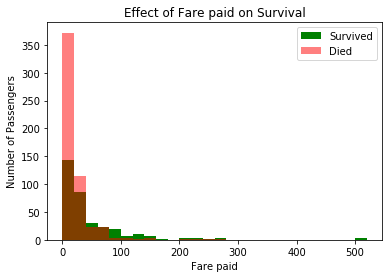

In [49]:
fare_df = titanic_df[["Survived", "Fare"]]
#fare of the passengers that survived
fare_df_survived = fare_df.loc[(fare_df["Survived"] == 1)]["Fare"]
#fare of the passengers that did not survive
fare_df_died = fare_df.loc[(fare_df["Survived"] == 0)]["Fare"]

max_fare = titanic_df["Fare"].max()
bins = (np.arange(0,max_fare+10,20))

plt.title('Effect of Fare paid on Survival')
plt.xlabel("Fare paid")
plt.ylabel("Number of Passengers")
plt.legend(['Survived', 'Died'])

plt.hist(fare_df_survived, bins = bins, color = 'green')
plt.hist(fare_df_died, bins = bins, color = 'red', alpha = 0.5)
plt.legend(['Survived', 'Died'])

It appears that everyone who paid above 250 survived the ship wreckage. The reason for this may be that the passengers who paid more were in the first class cabin, which was located close to the life boats. 

Hence we will now add that condition to our survival prediction model


In [45]:
def fare_prediction(df):
    predictions = []
    for index, row in df.iterrows():
        if (row["Age"]) < 10 :
            predictions.append(1)
        elif row["Sex"] == 'female':
            predictions.append(1)
        elif row["Fare"] >= 250:
            predictions.append(1)
        else:
            predictions.append(0)
    df["Prediction"] = predictions
    
reset_prediction(titanic_df)
fare_prediction(titanic_df)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [46]:
calculate_accuracy(titanic_df)

79.35%


Since the fare on its own made no difference to our model accuracy, we will analyse the effect of the size of the family of the passenger on the potential survival. 

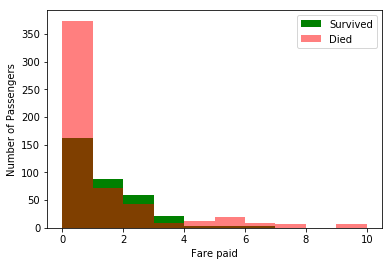

In [50]:
for index, row in titanic_df.iterrows():
    #creating a column for the total number of family members they are travelling with 
    titanic_df["Family"] = titanic_df["SibSp"] + titanic_df["Parch"]
    
siblings_df = titanic_df
siblings_df = siblings_df[["Family", "Survived"]]
#size of families of a passenger that survived
siblings_survived = siblings_df.loc[(siblings_df["Survived"] == 1)]["Family"]
#size of families of a passenger that did not survive
siblings_died = siblings_df.loc[(siblings_df["Survived"] == 0)]["Family"]

#calculating the bins for the histogram
max_fare = titanic_df["Family"].max()
bins = (np.arange(0,max_fare+1,1))

plt.xlabel("Fare paid")
plt.ylabel("Number of Passengers")
plt.hist(siblings_survived, bins = bins, color = 'green')
plt.hist(siblings_died, bins = bins, color = 'red', alpha = 0.5)

plt.legend(['Survived', 'Died'])



From the graph above it is clear that all passengers travelling with more than 4 family members did not survive. This could be because they did not want to leave any of their family behind and there was not enough space on the life boats for all of them. 

In [101]:
def final_prediction(df):
    predictions = []
    for index, row in df.iterrows():
        if (row["Age"]) < 10 :
            predictions.append(1)
        elif row["Family"] > 4:
            predictions.append(0)
        elif row["Sex"] == 'female':
            predictions.append(1)
        elif row["Fare"] >= 250:
            predictions.append(1)
        else:
            predictions.append(0)
    df["Prediction"] = predictions
    
reset_prediction(titanic_df)
final_prediction(titanic_df)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1


In [102]:
calculate_accuracy(titanic_df)

80.13%


The final accuracy of our model with the training set is 80.13%. 


In [103]:
predicted_dead = titanic_df.loc[titanic_df["Prediction"] == 0].shape[0] 
predicted_dead = round(float(predicted_dead)/float(rows)*100,2)
predicted_dead = str(predicted_dead) + '%'
predicted_dead

'62.63%'

We predict that approximately 62.63% of the passengers died in the ship wreckage. 

Let us now compare our ratio to known statistics on the internet. 
Based on my research there were 1317 passengers out of which 832 died

In [104]:
percent_dead = round((832.0/1317.0)*100,2)
percent_dead = str(percent_dead) +'%'
percent_dead

'63.17%'

Our models prediction was very close to that of the actual statistics of the titanic. 

In this project we have implemented a supervised learning machine learning model known as the decision tree. In the decision tree, we split the data into smaller subgroups, one feature at a time. Each split will create smaller, more homogeneous groups making our predictions more accurate. This approach is quicker and more accurate than a manual approach. In supervised learning, we use different features to make predictions with an objective outcome. The outcome can either be continuous or binary. In this case the yes or no is representative of if the person survived or not.
